NumPy Operations:
Mean Crude Oil Production: 5209.545454545455
Median Gas Production: 15.35
Standard Deviation of GDP: 6851.0505225659535
Max Crude Oil Production: 12900
Min GDP: 105.0
--------------------------------------------------
SciPy Pearson Correlation:
Correlation coefficient: 0.42499020116902575
P-value: 3.6962813604083015e-06
--------------------------------------------------
Statsmodels OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     23.81
Date:                Sun, 25 May 2025   Prob (F-statistic):           3.70e-06
Time:                        15:58:49   Log-Likelihood:                -1116.7
No. Observations:                 110   AIC:                             2237.
Df Residuals:       

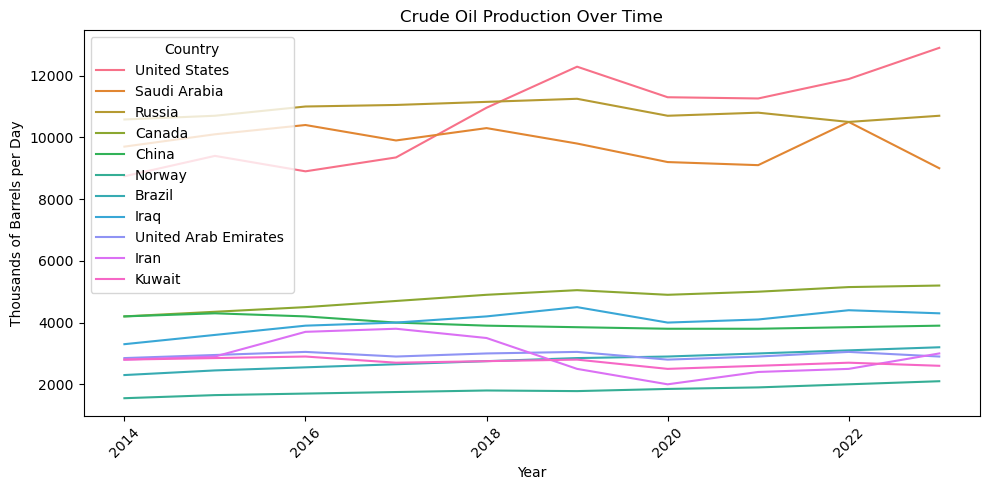

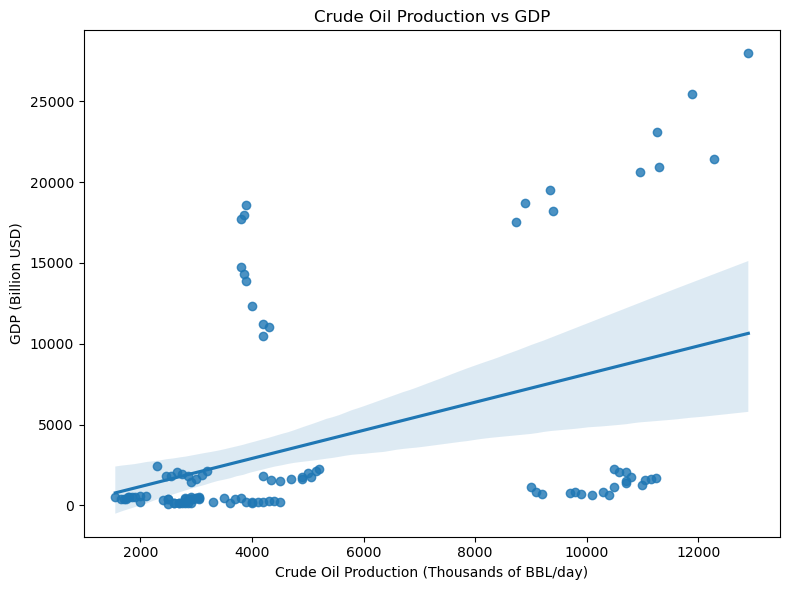

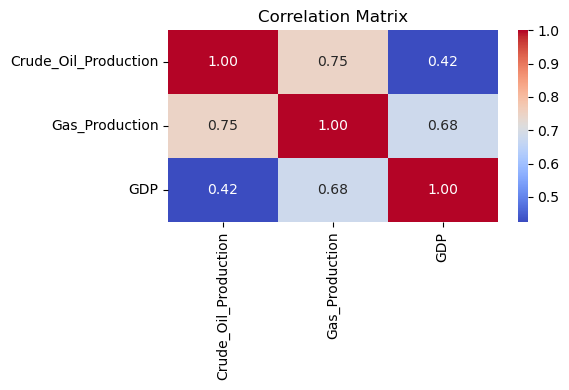

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm


df = pd.read_csv("FDatasets.csv")


df.columns = df.columns.str.strip()
df.rename(columns={
    'Crude Oil Production BBL per Day (Thousands': 'Crude_Oil_Production',
    'Natural Gas Production Billion Cubic Feet per Day': 'Gas_Production',
    'GDP Billion USD': 'GDP'
}, inplace=True)

# Convert to numeric and drop missing values
df['Crude_Oil_Production'] = pd.to_numeric(df['Crude_Oil_Production'], errors='coerce')
df['Gas_Production'] = pd.to_numeric(df['Gas_Production'], errors='coerce')
df['GDP'] = pd.to_numeric(df['GDP'], errors='coerce')
df.dropna(inplace=True)

# NumPy Operations
mean_oil = np.mean(df['Crude_Oil_Production'])
median_gas = np.median(df['Gas_Production'])
std_gdp = np.std(df['GDP'])
max_oil = np.max(df['Crude_Oil_Production'])
min_gdp = np.min(df['GDP'])

print("NumPy Operations:")
print(f"Mean Crude Oil Production: {mean_oil}")
print(f"Median Gas Production: {median_gas}")
print(f"Standard Deviation of GDP: {std_gdp}")
print(f"Max Crude Oil Production: {max_oil}")
print(f"Min GDP: {min_gdp}")
print("-" * 50)

# SciPy Operation
corr_coef, p_value = stats.pearsonr(df['Crude_Oil_Production'], df['GDP'])
print("SciPy Pearson Correlation:")
print(f"Correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")
print("-" * 50)

# Statsmodels Operation 
X = sm.add_constant(df['Crude_Oil_Production'])  # Add constant (intercept)
y = df['GDP']
model = sm.OLS(y, X).fit()
print("Statsmodels OLS Regression Summary:")
print(model.summary())
print("-" * 50)

# Visualization Time Series of Oil Production
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Crude_Oil_Production', hue='Country', data=df)
plt.title('Crude Oil Production Over Time')
plt.ylabel('Thousands of Barrels per Day')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----- Visualization 2: Scatter with Regression Line -----
plt.figure(figsize=(8, 6))
sns.regplot(x='Crude_Oil_Production', y='GDP', data=df)
plt.title('Crude Oil Production vs GDP')
plt.xlabel('Crude Oil Production (Thousands of BBL/day)')
plt.ylabel('GDP (Billion USD)')
plt.tight_layout()
plt.show()

# ----- Correlation Heatmap -----
plt.figure(figsize=(6, 4))
corr_matrix = df[['Crude_Oil_Production', 'Gas_Production', 'GDP']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
